# Walkshed map of the Westlake neighborhood of Los Angeles

I am looking at my home address and coding out a map that will tell me walking times between 5 and 15 minutes. 

In [25]:
#importing necessary libraries

import osmnx as ox
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
# for network analysis
import networkx as nx

In [26]:
#Defining home as my address
Home='134 S. Coronado St.' 

In [29]:
#Pulling up a map to get an idea of the neighborhood (and to test out a cool feature)

osm = ox.geometries_from_address(Home,tags={'building':True},dist=1000)

In [30]:
#What does this look like?
osm.shape 

(4634, 58)

In [31]:
#What kind of file is this?
type(osm)

geopandas.geodataframe.GeoDataFrame

In [32]:
#What do some of the lines look like?
osm.sample(10)

nodes  \
element_type osmid                                                          
way          426227714  [4255371467, 4255371692, 4255334073, 425533404...   
             419940559  [4199259361, 4199259360, 4199259348, 419925937...   
             426230705  [4255386452, 4255386395, 4255386206, 425538622...   
             426199539  [4255012785, 4255012768, 4255012767, 425501276...   
             426249913  [4255537110, 4255537109, 4255536704, 425553670...   
             419972505  [4199579497, 4199579494, 4199579485, 419957948...   
             426199363  [4255013433, 4255014139, 4255014145, 425501413...   
             426238514  [4255462730, 4255462742, 4255462735, 425546273...   
             419910868  [4198996861, 4198997108, 4198997109, 419899710...   
             426224215  [4255313990, 4255313673, 4255313664, 425531362...   

                       amenity     building  \
element_type osmid                            
way          426227714     NaN        house   
             419940559     NaN   apartments   
             426230705     NaN   apartments   
             426199539     NaN   apartments   
             426249913     NaN   apartments   
             419972505     NaN        house   
             426199363     NaN  residential   
             426238514     NaN   commercial   
             419910868     NaN   commercial   
             426224215     NaN  residential   

                                                                 geometry  \
element_type osmid                                                          
way          426227714  POLYGON ((-118.28104 34.07459, -118.28110 34.0...   
             419940559  POLYGON ((-118.27500 34.07715, -118.27499 34.0...   
             426230705  POLYGON ((-118.27777 34.06758, -118.27756 34.0...   
             426199539  POLYGON ((-118.27237 34.07502, -118.27201 34.0...   
             426249913  POLYGON ((-118.26840 34.06426, -118.26840 34.0...   
             419972505  POLYGON ((-118.28065 34.06480, -118.28064 34.0...   
             426199363  POLYGON ((-118.27601 34.07632, -118.27605 34.0...   
             426238514  POLYGON ((-118.28360 34.06361, -118.28347 34.0...   
             419910868  POLYGON ((-118.28510 34.07338, -118.28510 34.0...   
             426224215  POLYGON ((-118.27761 34.07158, -118.27762 34.0...   

                       addr:housenumber addr:postcode addr:street    ele  \
element_type osmid                                                         
way          426227714              NaN           NaN         NaN  100.3   
             419940559              NaN           NaN         NaN  110.8   
             426230705              NaN           NaN         NaN   98.9   
             426199539              NaN           NaN         NaN  116.8   
             426249913              NaN           NaN         NaN  130.3   
             419972505              NaN           NaN         NaN   98.6   
             426199363              NaN           NaN         NaN  108.8   
             426238514              NaN           NaN         NaN  102.7   
             419910868              NaN           NaN         NaN  100.8   
             426224215              NaN           NaN         NaN  103.4   

                       height lacounty:ain  ... district source_ref  \
element_type osmid                          ...                       
way          426227714    3.1   5156009007  ...      NaN        NaN   
             419940559    5.8   5402006009  ...      NaN        NaN   
             426230705    8.8   5155025015  ...      NaN        NaN   
             426199539    9.2   5402023008  ...      NaN        NaN   
             426249913    7.3   5154001009  ...      NaN        NaN   
             419972505    8.5   5155020018  ...      NaN        NaN   
             426199363    5.3   5401025012  ...      NaN        NaN   
             426238514   21.7   5155011001  ...      NaN        NaN   
             419910868   10.5 

In [33]:
#what columns does it have?
list(osm)

['nodes',
 'amenity',
 'building',
 'geometry',
 'addr:housenumber',
 'addr:postcode',
 'addr:street',
 'ele',
 'height',
 'lacounty:ain',
 'lacounty:bld_id',
 'name',
 'operator',
 'operator:wikidata',
 'operator:wikipedia',
 'source',
 'start_date',
 'building:units',
 'tourism',
 'building:use',
 'office',
 'fixme',
 'building:levels',
 'roof:shape',
 'consulate',
 'country',
 'diplomatic',
 'government',
 'website',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'shop',
 'outdoor_seating',
 'wikidata',
 'addr:city',
 'addr:state',
 'architect',
 'building:flats',
 'phone',
 'religion',
 'man_made',
 'name:en',
 'name:es',
 'gnis:county_name',
 'gnis:feature_id',
 'gnis:import_uuid',
 'gnis:reviewed',
 'district',
 'source_ref',
 'addr:country',
 'description',
 'historic',
 'wikipedia',
 'ways',
 'type',
 'addr:housename',
 'old_name']

In [34]:
#What type are the columns? 
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 4634 entries, ('way', 33539336) to ('relation', 6425484)
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   nodes               4634 non-null   object  
 1   amenity             12 non-null     object  
 2   building            4634 non-null   object  
 3   geometry            4634 non-null   geometry
 4   addr:housenumber    15 non-null     object  
 5   addr:postcode       13 non-null     object  
 6   addr:street         15 non-null     object  
 7   ele                 4587 non-null   object  
 8   height              4587 non-null   object  
 9   lacounty:ain        4586 non-null   object  
 10  lacounty:bld_id     4587 non-null   object  
 11  name                27 non-null     object  
 12  operator            3 non-null      object  
 13  operator:wikidata   1 non-null      object  
 14  operator:wikipedia  1 non-null      object  
 1

In [35]:
#subsetting buildings to shorten the list to exactly what we need.

columns_to_keep= ['geometry', 'building', 'height']
osm=osm[columns_to_keep]

In [36]:
osm.sample(10)

geometry  \
element_type osmid                                                          
way          426237300  POLYGON ((-118.28302 34.07156, -118.28306 34.0...   
             426223485  POLYGON ((-118.27510 34.06031, -118.27536 34.0...   
             426203606  POLYGON ((-118.27511 34.07335, -118.27513 34.0...   
             426246382  POLYGON ((-118.26617 34.06764, -118.26619 34.0...   
             426227618  POLYGON ((-118.27922 34.07381, -118.27925 34.0...   
             426203840  POLYGON ((-118.27365 34.07377, -118.27368 34.0...   
             427824130  POLYGON ((-118.28478 34.06036, -118.28478 34.0...   
             426208950  POLYGON ((-118.27335 34.07002, -118.27331 34.0...   
             426224188  POLYGON ((-118.27676 34.07156, -118.27675 34.0...   
             426227181  POLYGON ((-118.28043 34.07138, -118.28032 34.0...   

                           building height  
element_type osmid                          
way          426237300  residential    3.3  
             426223485       retail   14.7  
             426203606  residential    9.2  
             426246382  residential    3.8  
             426227618  residential    3.4  
             426203840  residential    3.3  
             427824130   commercial    9.4  
             426208950   apartments    2.9  
             426224188   apartments    7.1  
             426227181       retail    3.7

In [37]:
#Getting a count for what buildings are in my immediate vicinity. 
osm_building_counts=osm.building.value_counts()
osm_building_counts

apartments     1517
house          1353
residential    1154
commercial      203
yes             171
retail          134
industrial       31
hotel            22
garage           20
school           10
hospital         10
warehouse         5
shed              2
college           1
civic             1
Name: building, dtype: int64

In [38]:
type(osm_building_counts)

pandas.core.series.Series

In [39]:
#Making the list look more pretty. 
df_osm_building_types=pd.DataFrame(osm_building_counts)
df_osm_building_types

,building
apartments,1517
house,1353
residential,1154
commercial,203
yes,171
retail,134
industrial,31
hotel,22
garage,20
school,10


In [40]:
#resetting the index
df_osm_building_types=df_osm_building_types.reset_index()
df_osm_building_types

,index,building
0,apartments,1517
1,house,1353
2,residential,1154
3,commercial,203
4,yes,171
5,retail,134
6,industrial,31
7,hotel,22
8,garage,20
9,school,10


In [41]:
#Renaming my columns.
df_osm_building_types.columns=['building_type','count']
df_osm_building_types

,building_type,count
0,apartments,1517
1,house,1353
2,residential,1154
3,commercial,203
4,yes,171
5,retail,134
6,industrial,31
7,hotel,22
8,garage,20
9,school,10


<AxesSubplot:>

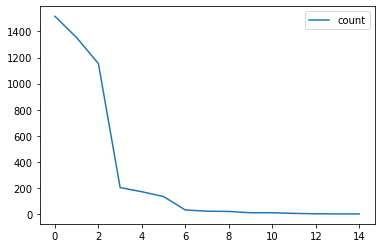

In [42]:
#LeTs SeE wHaT tHiS doES?
df_osm_building_types.plot()

## Clearly this isn't the type of plot I want to look at. Let's try something else....

<AxesSubplot:ylabel='building_type'>

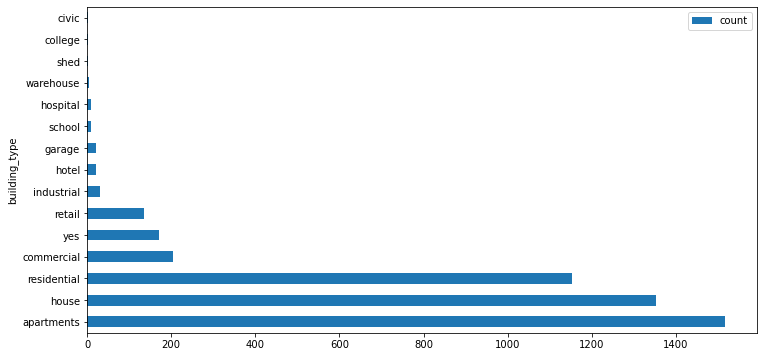

In [43]:
#How 'bout a bar graph?


df_osm_building_types.plot.barh(figsize=(12,6),
                                x='building_type')

In [44]:
#Let's arrange the list from lowest to highest count.
df_osm_building_types=df_osm_building_types.sort_values(by='count', ascending=True)
df_osm_building_types

,building_type,count
13,college,1
14,civic,1
12,shed,2
11,warehouse,5
9,school,10
10,hospital,10
8,garage,20
7,hotel,22
6,industrial,31
5,retail,134


TypeError: matplotlib.font_manager.FontProperties() argument after ** must be a mapping, not int

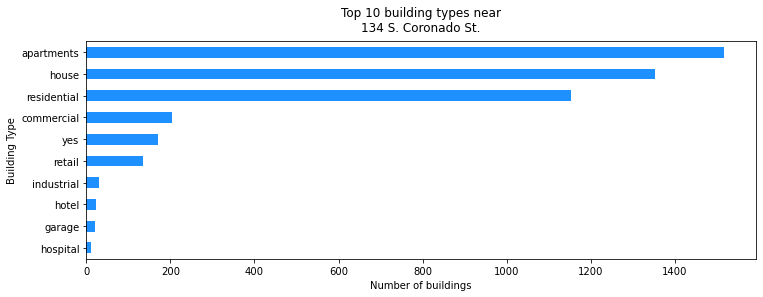

In [45]:
#Let's make a colorful map that will tell color code the buildings around us. 
fix, ax=plt.subplots(figsize=(12,4))
df_osm_building_types[-10:].plot.barh(ax=ax,
                                     x='building_type',
                                     y='count',
                                     legend=False,
                                     color='dodgerblue'
                                    )
ax.set_ylabel('Building Type')
ax.set_xlabel('Number of buildings')
ax.set_title("Top 10 building types near\n"+Home,font=14, pad=10);
                                    

In [ ]:
#creating a function that makes a map
def make_map(map):
    map.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

In [ ]:
#testing the function
make_map(osm)

In [ ]:
#Let's make the map prettier and with more details...
fig, ax=plt.subplots(figsize=(10,10))

osm.plot(ax=ax,
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc': 'upper left', 'bbox_to_anchor':(1,.9)})
ax.set_title('Building types in ' + Home)
ax.axis('off')


In [48]:
# configure the place, network type, trip times, and travel speed for the walkshed map
address = '134 S. Coronado St.'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

## Let's bring in another map and look at the nodes/edges

In [49]:
%%time

G = ox.graph_from_address(address, network_type=network_type, dist = 2000)

CPU times: user 7.29 s, sys: 198 ms, total: 7.49 s
Wall time: 19.3 s


In [50]:
G = ox.project_graph(G, to_crs='epsg:3857')

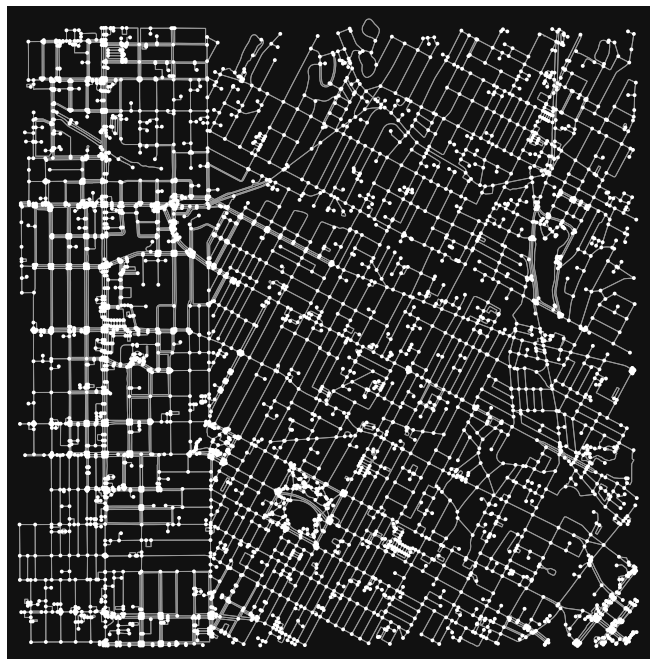

In [51]:
fig, ax = ox.plot_graph(G,figsize=(12,12))

In [52]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [53]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [54]:
gdf_nodes.sample(10)

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
5939894452,4.038799e+06,-1.316776e+07,3,-118.288028,34.074417,NaN,POINT (-13167763.088 4038798.753)
5999293239,4.038587e+06,-1.316870e+07,3,-118.296469,34.072839,NaN,POINT (-13168702.647 4038586.763)
190963919,4.038679e+06,-1.316749e+07,5,-118.285609,34.073524,traffic_signals,POINT (-13167493.807 4038678.834)
2118274650,4.037202e+06,-1.316722e+07,3,-118.283127,34.062533,NaN,POINT (-13167217.445 4037201.787)
6785825188,4.037213e+06,-1.316817e+07,3,-118.291656,34.062617,NaN,POINT (-13168166.911 4037213.088)
6787310987,4.037345e+06,-1.316859e+07,4,-118.295493,34.063597,NaN,POINT (-13168594.011 4037344.749)
473862741,4.036641e+06,-1.316585e+07,3,-118.270828,34.058362,NaN,POINT (-13165848.360 4036641.352)
5998942690,4.037085e+06,-1.316824e+07,4,-118.292295,34.061666,NaN,POINT (-13168238.089 4037085.312)
6787311045,4.036819e+06,-1.316831e+07,4,-118.292909,34.059682,NaN,POINT (-13168306.394 4036818.638)


<AxesSubplot:>

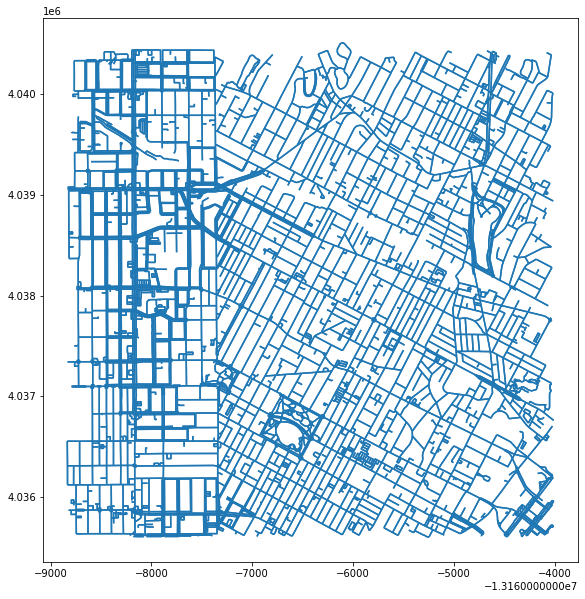

In [55]:
gdf_edges.plot(figsize=(10,10))

In [56]:
gdf_edges['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


footway                          3594
residential                      3396
service                          3096
primary                          1144
secondary                         914
tertiary                          872
steps                             104
[footway, steps]                   70
primary_link                       60
path                               20
pedestrian                         18
[service, footway]                 16
[service, residential]             10
[secondary, primary]                8
secondary_link                      8
[residential, steps]                8
tertiary_link                       6
track                               6
[footway, residential]              4
[residential, footway]              4
[residential, steps, footway]       3
[footway, steps, residential]       3
[path, tertiary]                    2
[service, residential, steps]       2
[service, path]                     2
[service, steps]                    2
[residential

In [57]:
stats = ox.basic_stats(G, circuity_dist='euclidean')
stats

/opt/conda/lib/python3.9/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 4455,
 'm': 13380,
 'k_avg': 6.006734006734007,
 'edge_length_total': 788588.8160000104,
 'edge_length_avg': 58.937878624813926,
 'streets_per_node_avg': 3.049158249158249,
 'streets_per_node_counts': {0: 0,
  1: 611,
  2: 0,
  3: 2445,
  4: 1366,
  5: 28,
  6: 3,
  7: 0,
  8: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1371492704826038,
  2: 0.0,
  3: 0.5488215488215489,
  4: 0.30662177328844,
  5: 0.006285072951739619,
  6: 0.0006734006734006734,
  7: 0.0,
  8: 0.0004489337822671156},
 'intersection_count': 3844,
 'street_length_total': 394294.4080000003,
 'street_segment_count': 6690,
 'street_length_avg': 58.937878624813195,
 'circuity_avg': 0.8958488698535653,
 'self_loop_proportion': 0.004334828101644245}

In [58]:
#Getting coordinates for the bound box 
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13168834.327020137
4035607.1954903686
-13164008.304267725
4040437.7988469847


In [59]:
#Getting center point for the map
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13166421.31564393
4038022.497168677


In [60]:
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 123000349


In [61]:
gdf_nodes.loc[[center_node]]

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
123000349,4.038082e+06,-1.316641e+07,4,-118.275878,34.069084,NaN,POINT (-13166410.557 4038082.136)


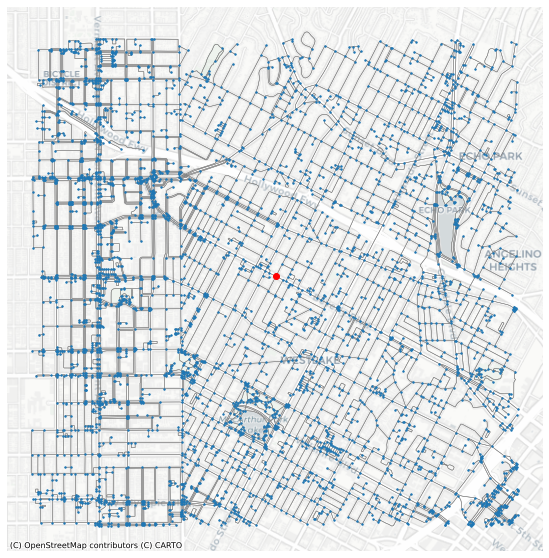

In [62]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

In [63]:
# a quick look at the data
gdf_edges[['osmid','name','highway','length']].sample(5)

,,,osmid,name,highway,length
u,v,key,,,,
8502651949,2385962933,0,907225143,North Coronado Street,residential,17.914
5998787925,123152239,0,398725547,South Vermont Avenue,primary,10.219
6787095387,6504793627,0,817079939,NaN,footway,9.781
5998942581,21300235,0,398734360,Wilshire Boulevard,primary,12.679
2117625989,2117625998,0,201750257,NaN,footway,31.105


In [64]:
# create a new column, calculate the time it takes to travel that edge
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

In [65]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(10)

,,,osmid,name,highway,length,walk_time
u,v,key,,,,,
6726015990,6726015992,0,173220537,South Occidental Boulevard,residential,15.825,0.211000
7457426764,7457426759,0,797365719,NaN,service,9.635,0.128467
6731829699,123065631,0,161701060,Coronado Street,tertiary,70.491,0.939880
9432720651,7138689651,0,764115873,NaN,service,61.564,0.820853
7678918592,9432400823,0,"[1022731462, 1022731463]",NaN,footway,100.843,1.344573
7153140446,7153140460,0,765897333,NaN,service,63.729,0.849720
6483332195,6483332196,0,690986421,NaN,service,14.854,0.198053
6787253477,7631061252,0,"[817079945, 817079946]",NaN,footway,108.735,1.449800
7370501156,7370501155,0,788327531,NaN,service,45.262,0.603493


In [73]:
# Color coding travel times
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [67]:
# Making dark colors match longer walk times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [68]:
# "Zipping" times and colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

In [69]:
# looping through times and colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


In [70]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time)

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 1528 nodes within 20 minutes 
There are 873 nodes within 15 minutes 
There are 344 nodes within 10 minutes 
There are 79 nodes within 5 minutes 


In [71]:
# spot check
gdf_nodes.sample(10)

,y,x,street_count,lon,lat,highway,geometry,time,color
osmid,,,,,,,,,
9245952440,4.037177e+06,-1.316625e+07,3,-118.274473,34.062352,NaN,POINT (-13166254.075 4037177.452),15 mins,#9c179e
9435434944,4.036782e+06,-1.316629e+07,3,-118.274832,34.059408,NaN,POINT (-13166294.094 4036781.808),15 mins,#9c179e
7864423386,4.039044e+06,-1.316778e+07,4,-118.288225,34.076239,NaN,POINT (-13167784.985 4039043.715),NaN,NaN
671846852,4.035716e+06,-1.316404e+07,3,-118.254591,34.051473,NaN,POINT (-13164040.832 4035715.702),NaN,NaN
6819346394,4.037527e+06,-1.316644e+07,1,-118.276122,34.064952,NaN,POINT (-13166437.719 4037526.831),10 mins,#ed7953
3187994744,4.039613e+06,-1.316809e+07,3,-118.290949,34.080477,NaN,POINT (-13168088.175 4039613.193),NaN,NaN
8317762098,4.036832e+06,-1.316797e+07,3,-118.289873,34.059781,NaN,POINT (-13167968.462 4036831.968),20 mins,#0d0887
1459262971,4.038153e+06,-1.316802e+07,3,-118.290326,34.069612,NaN,POINT (-13168018.812 4038153.065),NaN,NaN
4399334472,4.036371e+06,-1.316576e+07,3,-118.270060,34.056349,NaN,POINT (-13165762.878 4036370.805),NaN,NaN


In [72]:
#making areas outside the walk shed grey
gdf_nodes['color'].fillna('#cccccc', inplace=True)

In [169]:
#Juuuuust checking
gdf_nodes.sample(10)

,y,x,street_count,lon,lat,highway,geometry,time,color
osmid,,,,,,,,,
3402869621,4.035645e+06,-1.316433e+07,3,-118.257212,34.050947,NaN,POINT (-13164332.600 4035645.044),NaN,#cccccc
5939885111,4.038404e+06,-1.316817e+07,3,-118.291688,34.071476,NaN,POINT (-13168170.473 4038403.590),NaN,#cccccc
6726405572,4.040161e+06,-1.316768e+07,4,-118.287307,34.084553,NaN,POINT (-13167682.805 4040161.127),NaN,#cccccc
6792710865,4.036569e+06,-1.316415e+07,3,-118.255603,34.057821,NaN,POINT (-13164153.554 4036568.565),NaN,#cccccc
2118017861,4.037144e+06,-1.316734e+07,4,-118.284256,34.062101,NaN,POINT (-13167343.091 4037143.792),15 mins,#9c179e
1966165273,4.036712e+06,-1.316726e+07,4,-118.283522,34.058889,NaN,POINT (-13167261.483 4036712.177),15 mins,#9c179e
7643483753,4.038798e+06,-1.316759e+07,4,-118.286490,34.074414,NaN,POINT (-13167591.823 4038798.444),NaN,#cccccc
4014979463,4.035797e+06,-1.316816e+07,3,-118.291626,34.052081,NaN,POINT (-13168163.527 4035797.405),NaN,#cccccc
3698087310,4.035743e+06,-1.316422e+07,4,-118.256216,34.051674,crossing,POINT (-13164221.737 4035742.640),NaN,#cccccc


<AxesSubplot:>

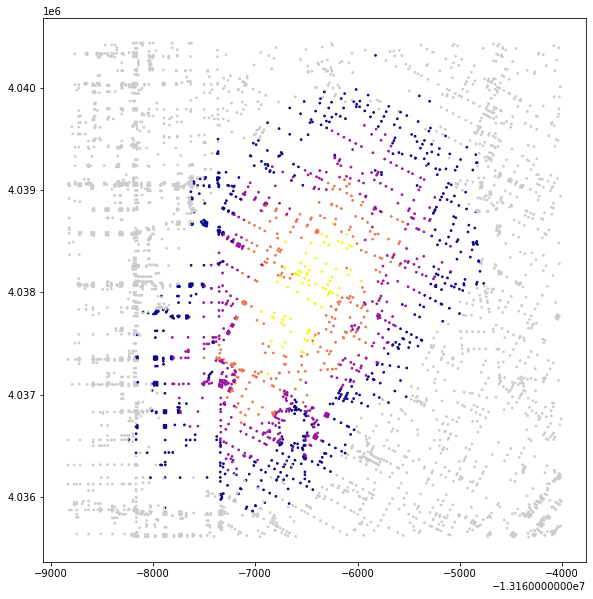

In [74]:
# Let's map it
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

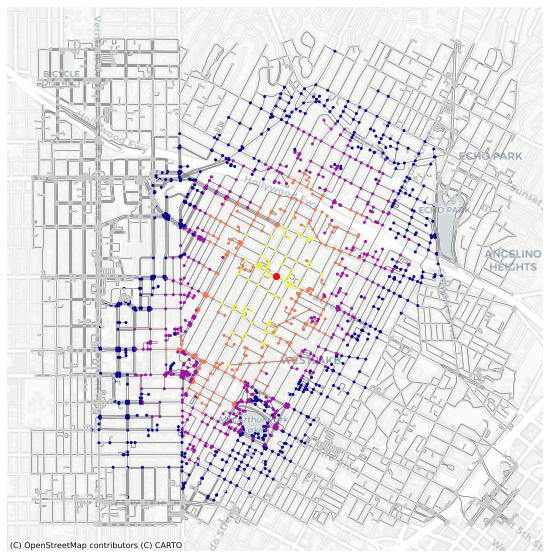

In [75]:
#Mapping a map
#Adding subplots
fig, ax = plt.subplots(figsize=(10,10))

# adding edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# adding nodes
gdf_nodes.plot(ax=ax,
               color=gdf_nodes['color'],
               markersize=4, 
               zorder=20)

# adding center node
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# removing axis
ax.axis('off')

# adding basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

In [76]:
# Let's look at 5 minutes
gdf_nodes[gdf_nodes['time']=='5 mins']

,y,x,street_count,lon,lat,highway,geometry,time,color
osmid,,,,,,,,,
122688732,4.038108e+06,-1.316596e+07,3,-118.271857,34.069277,NaN,POINT (-13165962.885 4038107.978),5 mins,#f0f921
122992361,4.038170e+06,-1.316609e+07,4,-118.272998,34.069740,NaN,POINT (-13166089.968 4038170.280),5 mins,#f0f921
60946391,4.038545e+06,-1.316630e+07,4,-118.274900,34.072527,traffic_signals,POINT (-13166301.642 4038544.820),5 mins,#f0f921
7874807199,4.038488e+06,-1.316633e+07,3,-118.275148,34.072108,NaN,POINT (-13166329.215 4038488.497),5 mins,#f0f921
6483332195,4.038672e+06,-1.316624e+07,3,-118.274315,34.073476,NaN,POINT (-13166236.531 4038672.343),5 mins,#f0f921
...,...,...,...,...,...,...,...,...,...
1966013585,4.037977e+06,-1.316629e+07,3,-118.274780,34.068301,NaN,POINT (-13166288.250 4037976.860),5 mins,#f0f921
1966013667,4.037890e+06,-1.316642e+07,3,-118.275921,34.067653,NaN,POINT (-13166415.265 4037889.725),5 mins,#f0f921
6819346397,4.037633e+06,-1.316647e+07,3,-118.276402,34.065745,NaN,POINT (-13166468.788 4037633.326),5 mins,#f0f921


In [83]:
# defining it as a variable
gdf_5 = gdf_nodes[gdf_nodes['time']=='5 mins']

<AxesSubplot:>

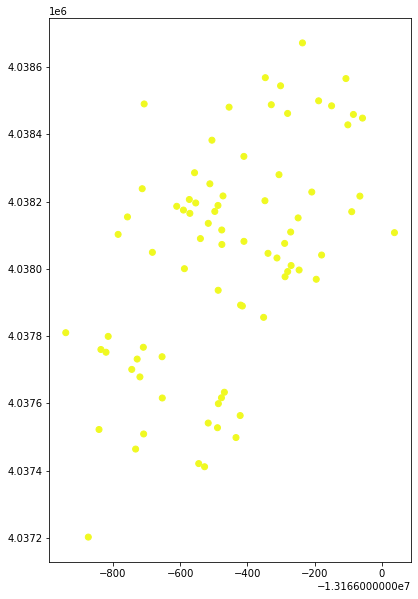

In [84]:
# plotting it
gdf_5.plot(figsize=(10,10),color=gdf_5.color)

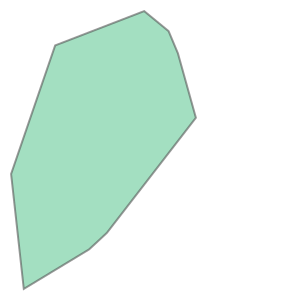

In [85]:
# combine all the points (unary_union) and create a convex hull polygon
gdf_5.unary_union.convex_hull

In [86]:
# dissolve the nodes by time
isochrones = gdf_nodes.dissolve("time")
isochrones

/opt/conda/lib/python3.9/site-packages/geopandas/geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


,geometry,y,x,street_count,lon,lat,highway,color
time,,,,,,,,
10 mins,"MULTIPOINT (-13167500.508 4037359.867, -131673...",4.037818e+06,-1.316590e+07,4,-118.271334,34.067115,stop,#ed7953
15 mins,"MULTIPOINT (-13167811.724 4037558.477, -131678...",4.038559e+06,-1.316732e+07,3,-118.284062,34.072632,traffic_signals,#9c179e
20 mins,"MULTIPOINT (-13168236.719 4036559.818, -131681...",4.039298e+06,-1.316499e+07,3,-118.263148,34.078131,traffic_signals,#0d0887
5 mins,"MULTIPOINT (-13166940.560 4037810.426, -131668...",4.038108e+06,-1.316596e+07,3,-118.271857,34.069277,traffic_signals,#f0f921


In [87]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index()
isochrones

,time,0
0,10 mins,"POLYGON ((-13167039.734 4036671.504, -13167137..."
1,15 mins,"POLYGON ((-13167266.726 4036261.796, -13167637..."
2,20 mins,"POLYGON ((-13167026.487 4035862.636, -13167881..."
3,5 mins,"POLYGON ((-13166873.490 4037202.446, -13166940..."


In [88]:
#Renaming geometry column
isochrones.columns=['time','geometry']


In [89]:
isochrones.head()

,time,geometry
0,10 mins,"POLYGON ((-13167039.734 4036671.504, -13167137..."
1,15 mins,"POLYGON ((-13167266.726 4036261.796, -13167637..."
2,20 mins,"POLYGON ((-13167026.487 4035862.636, -13167881..."
3,5 mins,"POLYGON ((-13166873.490 4037202.446, -13166940..."


<AxesSubplot:>

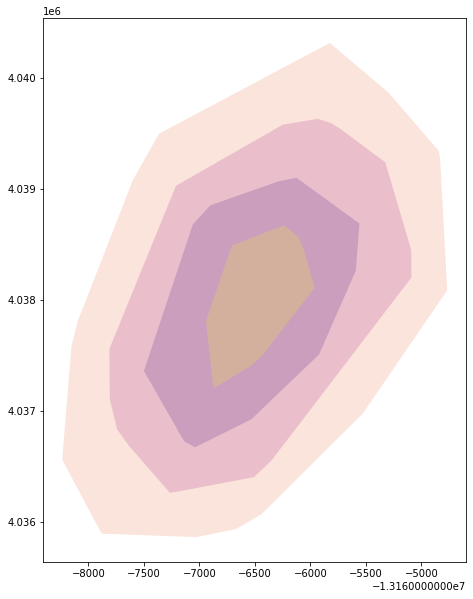

In [90]:
Plotting polygons only
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

TypeError: 'str' object is not callable

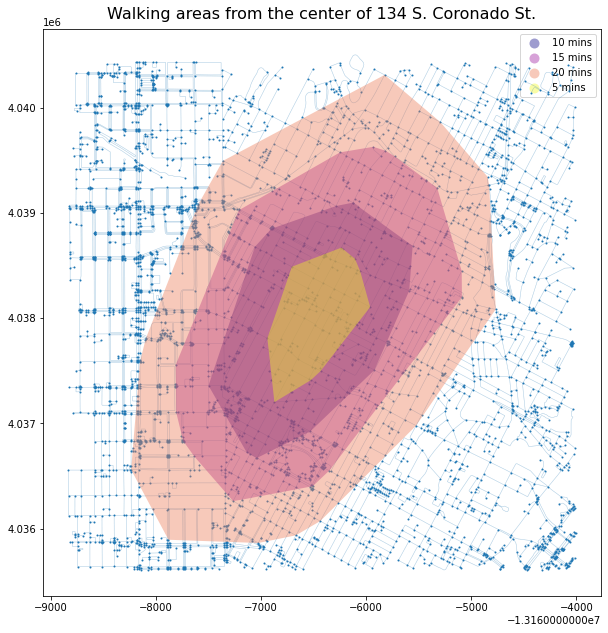

In [91]:

fig, ax = plt.subplots(figsize=(10,15))

isochrones.plot(alpha=.4,
                ax=ax,
                column='time',
                cmap='plasma',
                legend=True,
                zorder=20)
gdf_nodes.plot(ax=ax,
               markersize=1,
               zorder=10)
gdf_edges.plot(ax=ax,
               linewidth=.5,
               alpha=.2,
               zorder=10)
ax.axis=('off')
ax.set_title('Walking areas from the center of ' + address,fontsize=16,pad=10)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
# additional libraries for geometry shapes
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch

In [ ]:
#Making a function to make a better map.

def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
       
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

In [ ]:
# call function to create "better" isochrones for G
isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)

In [ ]:
# Create an empty geopandas GeoDataFrame
better_isos = gpd.GeoDataFrame()
better_isos['geometry'] = None

In [ ]:
# loop through the polygons and add them to geodataframe
for i in range(len(isochrone_polys)):
    better_isos.loc[i,'geometry'] = isochrone_polys[i]
    better_isos.loc[i,'time'] =  str(trip_times[i]) + ' mins'
better_isos

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))
better_isos.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                edgecolor='white',
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
                markersize=1, 
                zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from center of ' + address)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)